In [13]:
import os
import matplotlib.pyplot as plt
import networkx as nx
from nltk.tokenize import word_tokenize, sent_tokenize
import string
from collections import Counter
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [3]:
### read the input params
worlds = [line.strip().split(' ')[0] for line in open('../data/worlds_clean.txt')]
books  = {int(f.split(' ')[0]) : f for f in os.listdir('../data/Foundation_201811')}

In [10]:
### build the edge list
edges = {}
worlds_words = {}
all_words = []

for i in range(1,8):
    book = books[i]
    with open('../data/Foundation_201811/' + book) as myfile:
        text  = myfile.read()
        sents = sent_tokenize(text)
        
        for ind, sent in enumerate(sents):
            
            for w in worlds:
                if w in sent:

                    tokens   = word_tokenize(sent)
                    tokens   = [w.lower() for w in tokens if w.title() not in worlds]
                    table    = str.maketrans('', '', string.punctuation)
                    stripped = [w.translate(table) for w in tokens]
                    words    = [word for word in stripped if word.isalpha()]
                    words    = [w for w in words if not w in stop_words]
                    words    = [w.title() if w.title() in worlds else w for w in words]
                    
                    if w not in worlds_words:
                        worlds_words[w] = []
                    worlds_words[w] += words
                    all_words += words

                    for word in words:
                        edge = w + '\t' + word
                        if edge not in edges:
                            edges[edge] = 1
                        else: 
                            edges[edge] += 1  
                
len(edges)

22310

In [11]:
### build the network and save as a gephi file
G = nx.Graph()
for edge, w in edges.items():
    e1, e2 = edge.split('\t')
    G.add_edge(e1, e2, weight = w)
    
# nx.write_gexf(G, 'worlds_words.gexf')
len(G.nodes), len(G.edges)  

(8375, 22299)

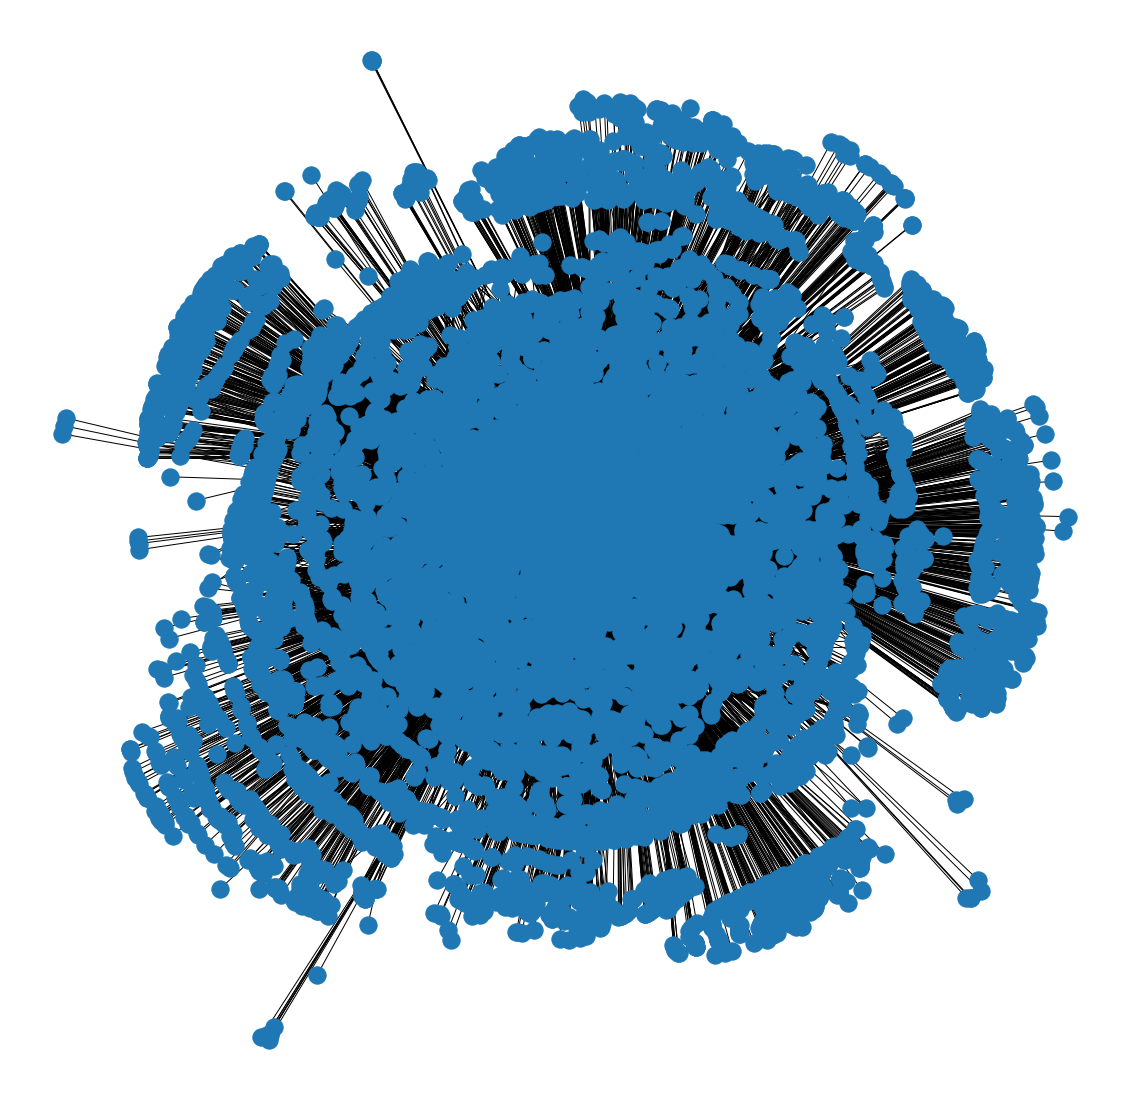

In [14]:
### a simple visualization of the network
f, ax = plt.subplots(1,1,figsize=(20,20))
nx.draw(G)